In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('df_file')
display(df)

,position,first_name,last_name,age,gender,country,real_time_position,worth(BUSD),worth(millions_USD),work_field,company,image,name,education
0,1.0,Jeff,Bezos,54,M,United States,1,112.0,0.000,Technology,Amazon,https://specials-images.forbesimg.com/imageser...,Jeff_Bezos,None
1,2.0,Bill,Gates,62,M,United States,2,90.0,-0.001,Technology,Microsoft,https://specials-images.forbesimg.com/imageser...,Bill_Gates,None
2,3.0,Warren,Buffett,87,M,United States,3,84.0,-0.002,Finance and Investments,Berkshire Hathaway,https://specials-images.forbesimg.com/imageser...,Warren_Buffett,None
3,4.0,Bernard,Arnault,69,M,France,4,72.0,0.000,Fashion & Retail,Lvmh,https://specials-images.forbesimg.com/imageser...,Bernard_Arnault,None
4,5.0,Mark,Zuckerberg,34,M,United States,5,71.0,0.000,Technology,Facebook,https://specials-images.forbesimg.com/imageser...,Mark_Zuckerberg,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2204.0,Zhao,Xiaoqiang,51,M,China,2134,1.0,0.000,Fashion & Retail,"Fashion, Entertainment",https://specials-images.forbesimg.com/imageser...,Zhao_Xiaoqiang,None
2204,2205.0,Zhou,Liangzhang,55,M,China,2134,1.0,NaN,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...,Zhou_Liangzhang,None
2205,2206.0,Zhu,Xingming,51,M,China,1856,1.0,0.000,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...,Zhu_Xingming,None
2206,2207.0,Jun,Zhuo,52,F,Hong Kong,1978,1.0,0.000,Manufacturing,Printed Circuit Boards,https://specials-images.forbesimg.com/imageser...,Jun_Zhuo,None


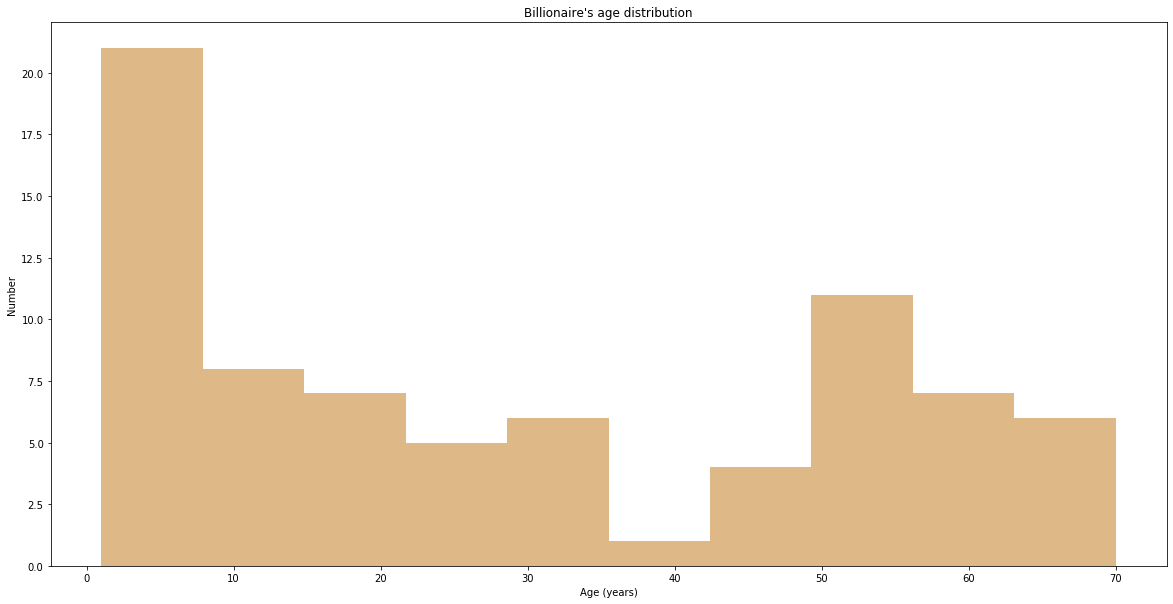

In [10]:
colors = ['burlywood', 'yellowgreen', 'gold', 'r', 'orangered', 'mediumvioletred', 'skyblue', 'navy', 'grey', 'black']
df['age'].value_counts().plot(kind='hist', figsize=(20,10), color = colors)
plt.xlabel('Age (years)')
plt.ylabel('Number')
plt.title("Billionaire's age distribution")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9354d21750>]],
      dtype=object)

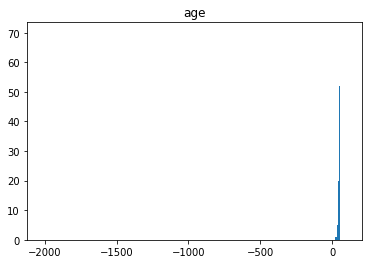

In [30]:
for i in df['age']:
    if i<0:
        df['age'][i] =np.nan
df.hist(column='age',grid=False, bins=10000)

In [4]:
df.describe()

,position,age,real_time_position,worth(BUSD),worth(millions_USD)
count,2208.000000,2208.000000,2208.000000,2208.000000,2101.000000
mean,1104.500000,2.497736,1102.043478,4.103080,-0.484737
std,637.539018,352.378150,630.218047,6.913084,26.330360
min,1.000000,-2019.000000,1.000000,1.000000,-672.311000
25%,552.750000,53.000000,555.750000,1.400000,0.000000
50%,1104.500000,63.000000,1106.500000,2.200000,0.000000
75%,1656.250000,73.000000,1655.250000,4.000000,0.000000
max,2208.000000,99.000000,2153.000000,112.000000,530.206000


Text(0.5, 1.0, 'Number of billionaires per country')

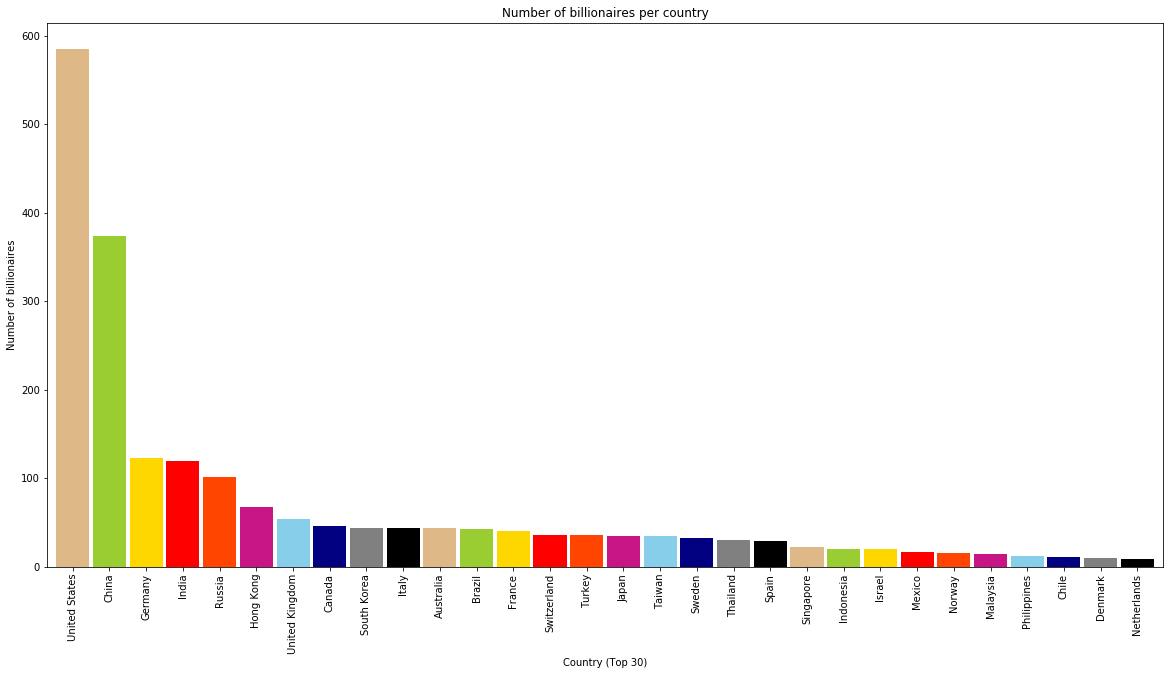

In [5]:
# Which country has maximum numbers of billionaires??
colors = ['burlywood', 'yellowgreen', 'gold', 'r', 'orangered', 'mediumvioletred', 'skyblue', 'navy', 'grey', 'black']
df['country'].value_counts()[:30].plot(kind='bar', width=0.9, figsize=(20,10), color = colors)
plt.xlabel('Country (Top 30)')
plt.ylabel('Number of billionaires')
plt.title('Number of billionaires per country')


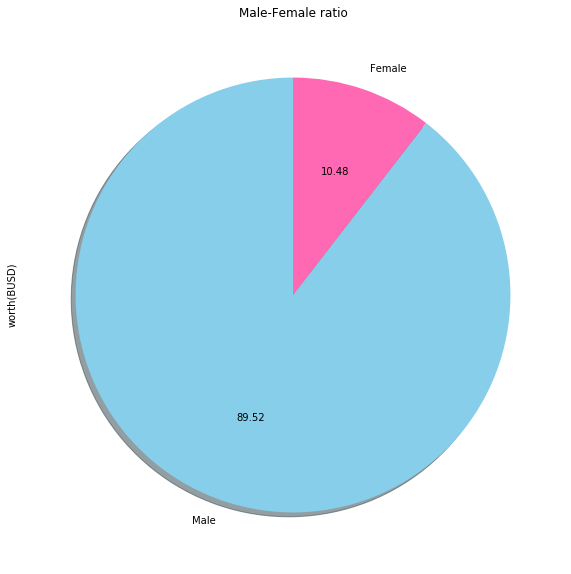

In [6]:
# Male to female ratio based on the total of dollares
male_female_ratio = df.groupby('gender')['worth(BUSD)'].sum().sort_values(ascending=False)/100

# In this case we will represent that variable in a pie chart:
gender = ['Male', 'Female']
colors = ['skyblue', 'hotpink']
male_female_ratio.plot(kind='pie', labels = gender, colors = colors, startangle=90, shadow=True, figsize=(20,10),  autopct='%.2f')
plt.title('Male-Female ratio')
plt.show()


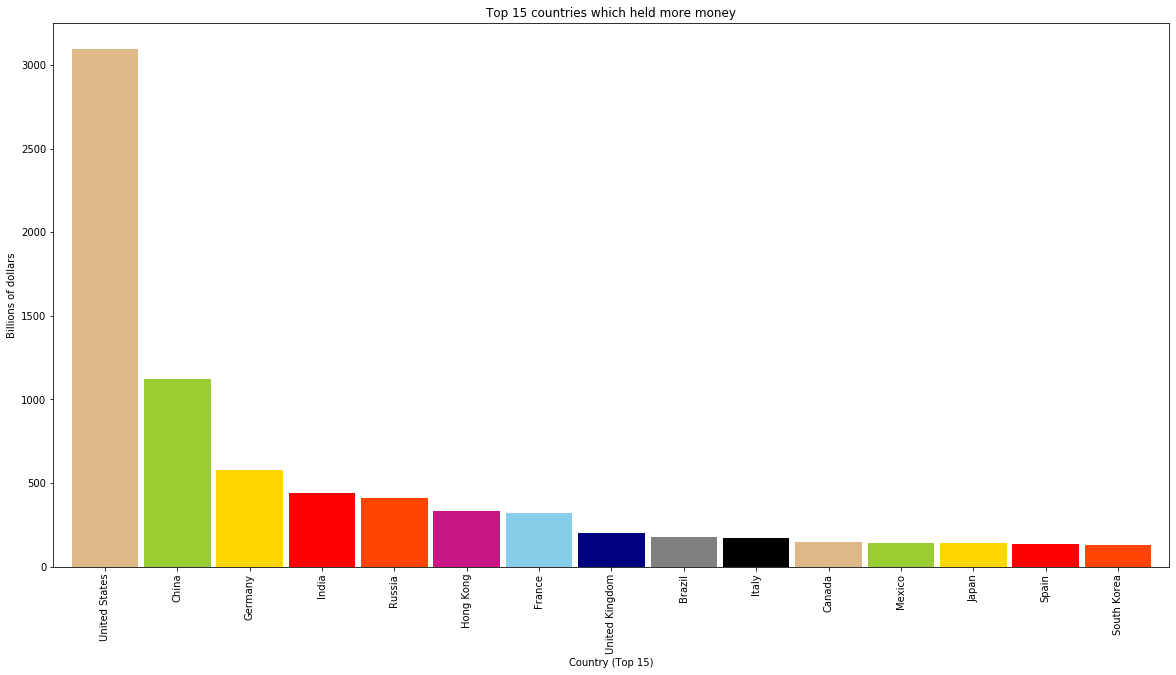

In [7]:
# Which country has the greatest share in terms of total money held by its billionaires??
colors = ['burlywood', 'yellowgreen', 'gold', 'r', 'orangered', 'mediumvioletred', 'skyblue', 'navy', 'grey', 'black']
total_per_country = df.groupby('country')['worth(BUSD)'].sum().sort_values(ascending=False)[:15]
total_per_country.plot(kind='bar', width=0.92, figsize=(20,10), color = colors)
plt.xlabel('Country (Top 15)')
plt.ylabel('Billions of dollars')
plt.title('Top 15 countries which held more money')
plt.show()

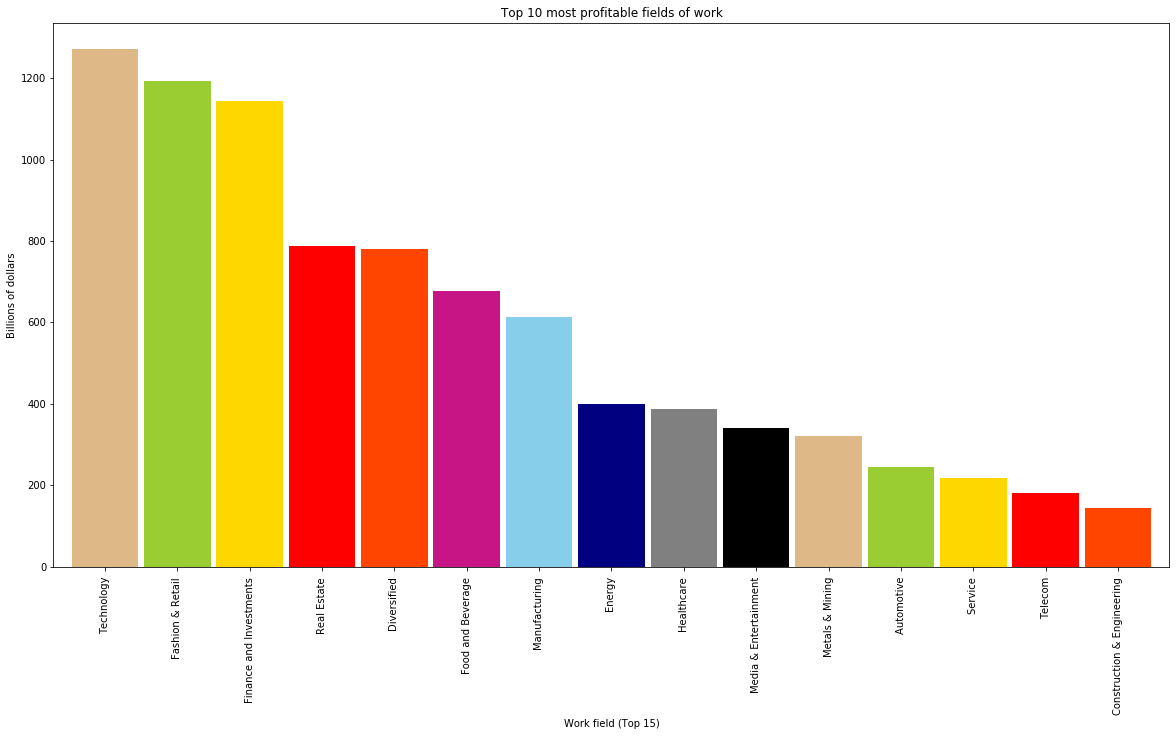

In [8]:
# Top 10 most profitable field of work
most_profitable_work_field = df.groupby('work_field')['worth(BUSD)'].sum().sort_values(ascending=False)[:15]
most_profitable_work_field.plot(kind='bar', width=0.92, figsize=(20,10), color = colors)
plt.xlabel('Work field (Top 15)')
plt.ylabel('Billions of dollars')
plt.title('Top 10 most profitable fields of work')
plt.show()

In [32]:
df = pd.read_csv('../package1/web')
df

,Unnamed: 0,first_name,last_name,age,gender,country,education,real_time_position,worth(BUSD),worth(millions_USD),work_field,company,image
0,0,Jeff,Bezos,54,M,United States,Yes,1,112.0,0.000,Technology,Amazon,https://specials-images.forbesimg.com/imageser...
1,1,Bill,Gates,62,M,United States,No,2,90.0,-0.001,Technology,Microsoft,https://specials-images.forbesimg.com/imageser...
2,2,Warren,Buffett,87,M,United States,Yes,3,84.0,-0.002,Finance and Investments,Berkshire Hathaway,https://specials-images.forbesimg.com/imageser...
3,3,Bernard,Arnault,69,M,France,Yes,4,72.0,0.000,Fashion & Retail,Lvmh,https://specials-images.forbesimg.com/imageser...
4,4,Mark,Zuckerberg,34,M,United States,No,5,71.0,0.000,Technology,Facebook,https://specials-images.forbesimg.com/imageser...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2203,Zhao,Xiaoqiang,51,M,China,No,2134,1.0,0.000,Fashion & Retail,"Fashion, Entertainment",https://specials-images.forbesimg.com/imageser...
2204,2204,Liangzhang,Zhou,55,M,China,No,2134,1.0,NaN,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...
2205,2205,Xingming,Zhu,51,M,China,No,1856,1.0,0.000,Manufacturing,Electrical Equipment,https://specials-images.forbesimg.com/imageser...
2206,2206,Jun,Zhuo,52,F,Hong Kong,No,1978,1.0,0.000,Manufacturing,Printed Circuit Boards,https://specials-images.forbesimg.com/imageser...
